
Classification Report:
              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00        88
    Moderate       1.00      1.00      1.00        61
      Normal       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:


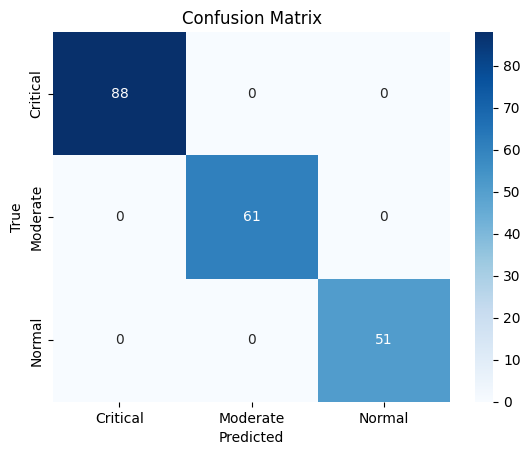

✅ Model saved as model.pkl


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load dataset
df = pd.read_csv("market_pipe_thickness_loss_dataset.csv")

# Features and target
X = df.drop("Condition", axis=1)
y = df["Condition"]

# Define categorical and numeric features
categorical_features = ["Material", "Grade"]
numeric_features = [
    "Pipe_Size_mm", "Thickness_mm", "Max_Pressure_psi",
    "Temperature_C", "Corrosion_Impact_Percent",
    "Thickness_Loss_mm", "Material_Loss_Percent", "Time_Years"
]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

# Build pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit pipeline
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=pipeline.classes_,
            yticklabels=pipeline.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Save trained pipeline
joblib.dump(pipeline, "model.pkl")
print("✅ Model saved as model.pkl")
